In [3]:
import nmslib
import numpy as np

In [13]:
from matplotlib import pyplot as plt  
import cv2

def plot_images(imgs, names=None):        
    fig, axs = plt.subplots(ncols=len(imgs), figsize=(16, 8))
    for i, ax in enumerate(axs):
        ax.imshow(imgs[i])
#         ax.set_axis_off()
        if names and i < len(names):
            ax.set_title(names[i], fontsize=15)
    plt.show()
    
def plot_image(img, img_size=5):
    img = np.array(img)

    height, width = img.shape[:2]
    fig = plt.figure()
    fig.set_size_inches(width / height * img_size, img_size, forward=True)
    ax = plt.Axes(fig, [0., 0., 1, 1])
#     ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img, cmap=plt.get_cmap('gray'))

    plt.show()
    
def augment_and_show(aug, image, figsize=10, **kwargs):
    res = aug(image=image, **kwargs)
    image = res['image']
    if 'mask' in res:
        plot_images([image, res['mask']])
    else:
        plot_image(image, figsize)

In [17]:
def idx2img(idx, paths):
    return cv2.imread(paths[idx])[..., ::-1]

In [4]:
embeds = np.load("embeds.npy")
paths = np.load("paths.npy")

In [5]:
paths[[0, 4, 11]]

array(['/mnt/pmldl/flowers104/14/fb0e3a0f9.jpg',
       '/mnt/pmldl/flowers104/14/186c8f72b.jpg',
       '/mnt/pmldl/flowers104/14/da7e8ea0d.jpg'], dtype='<U39')

In [9]:
# initialize a new index, using a HNSW index on Cosine Similarity
index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(embeds)
index.createIndex({'post': 2}, print_progress=True)

In [21]:
# query for the nearest neighbours of the first datapoint
ids, distances = index.knnQuery(embeds[0], k=10)

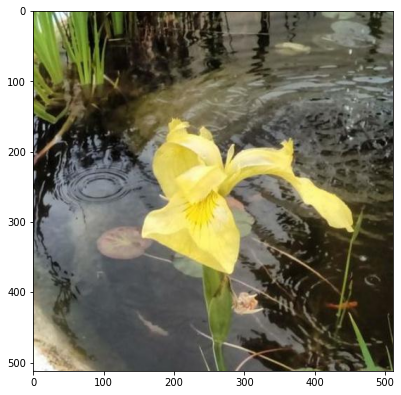

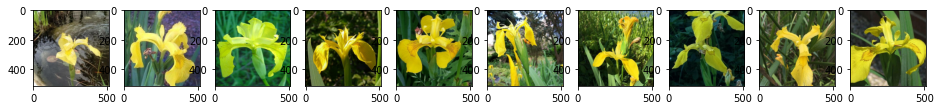

In [22]:
plot_image(idx2img(0, paths))
plot_images([idx2img(iid, paths) for iid in ids])